In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import matplotlib
matplotlib.rcParams['figure.figsize'] = (12, 8)

import warnings
warnings.filterwarnings('ignore')

# k Nearest Neighbors (kNN)
Метод k ближайших соседей рассчитывает расстояния от нового объекта до всех объектов выборки и, отбирая k ближайших, предсказывает целевую переменную с помощью голосования (в случае классификации) или усреднения (в случае регрессии). \
При этом этот метод можно по-разному настраивать, например можно изменить способ подсчета расстояний или способ взвешивания соседей по расстоянию. \
Для начала скачаем датасет и визуализируем данные.

In [2]:
circ = pd.read_csv('concertriccir2.csv')
circ.head()

,X,Y,class
0,0.70,-0.247,0.0
1,-3.95,2.740,1.0
2,0.15,-2.160,1.0
3,-1.67,-0.942,1.0
4,2.56,-1.850,1.0


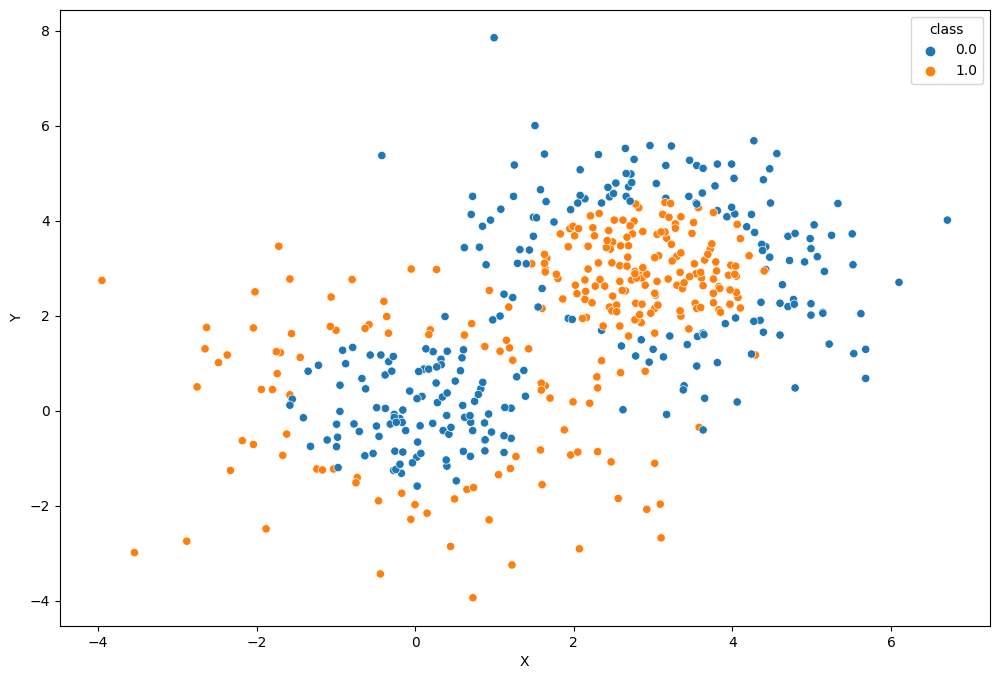

In [3]:
sns.scatterplot(circ['X'], circ['Y'], hue=circ['class']);

**Задание 1.** Обучите логистическую регрессию на данных и нарисуйте разделяющую гиперплоскость (прямую) на рисунке с данными. Как линейный классификатор справился с задачей? Сделайте вывод исходя из геометрии данных и линии разделения. Какой accuracy выйдет на всей выборке (без валидации)?

              precision    recall  f1-score   support

           0      0.432     0.484     0.457       250
           1      0.414     0.364     0.387       250

    accuracy                          0.424       500
   macro avg      0.423     0.424     0.422       500
weighted avg      0.423     0.424     0.422       500



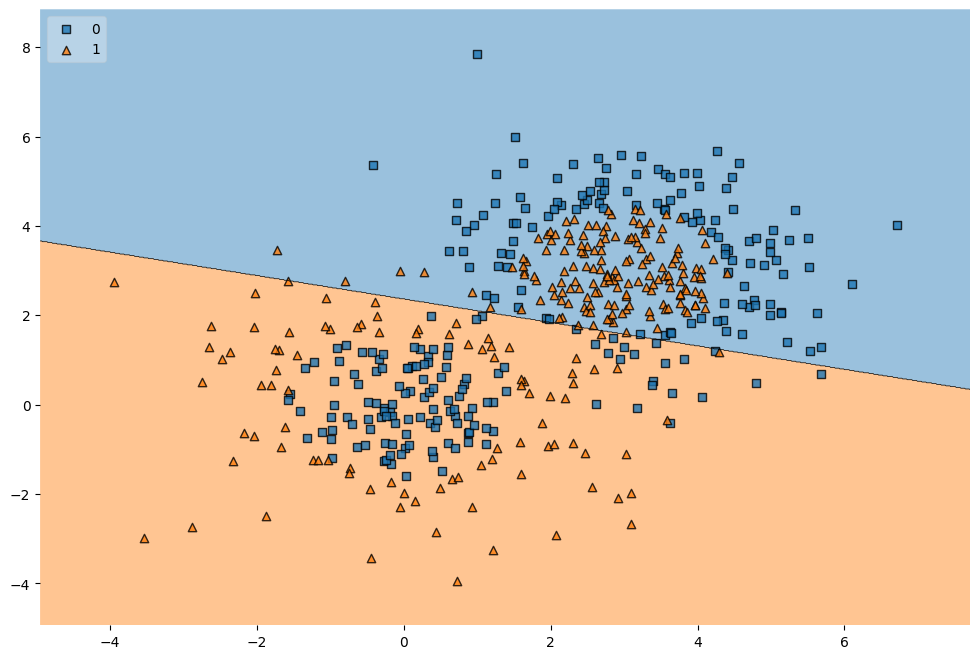

In [26]:
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from mlxtend.plotting import plot_decision_regions
from sklearn.metrics import classification_report
### Your code is here

X = circ.drop("class", axis=1)
y = circ["class"].astype('int')
model = LogisticRegression()
model.fit(X, y)

plot_decision_regions(X=np.array(X), y=np.array(y) ,clf=model, legend=2)
#np.array(X)
print(classification_report(y, model.predict(X), digits=3))

**Задание 2.** Разделите обучающую выборку и обучите 6 моделей kNN с различным числом соседей из `all_k`, сохраните обученные классификаторы в список. \
Выведите accuracy на тренировочной и тестовой выборке для каждой модели. Каково оптимальное число соседей с точки зрения accuracy?

In [27]:
X = circ[['X', 'Y']].values
y = circ['class'].values.astype('int')

In [28]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, 
                                                    shuffle=True, random_state=2022)

In [44]:
from sklearn.neighbors import KNeighborsClassifier
all_k = [1, 3, 10, 30, 40, 60]

### Your code is here
knn_list = []
knn = KNeighborsClassifier() 
#knn.fit(X_train, y_train)


for K in all_k:

    knn = KNeighborsClassifier(n_neighbors=K) 
    knn.fit(X_train, y_train)
    knn_list.append(knn)
    print(classification_report(y_train, knn.predict(X_train), digits=3))
    print(classification_report(y_test, knn.predict(X_test), digits=3))
    

              precision    recall  f1-score   support

           0      1.000     1.000     1.000       199
           1      1.000     1.000     1.000       201

    accuracy                          1.000       400
   macro avg      1.000     1.000     1.000       400
weighted avg      1.000     1.000     1.000       400

              precision    recall  f1-score   support

           0      0.870     0.922     0.895        51
           1      0.913     0.857     0.884        49

    accuracy                          0.890       100
   macro avg      0.892     0.889     0.890       100
weighted avg      0.891     0.890     0.890       100

              precision    recall  f1-score   support

           0      0.949     0.945     0.947       199
           1      0.946     0.950     0.948       201

    accuracy                          0.948       400
   macro avg      0.948     0.947     0.947       400
weighted avg      0.948     0.948     0.947       400

              preci

'\n\nfrom sklearn.model_selection import GridSearchCV\n\nparam_grid = {\n    \'n_neighbors\': [1, 3, 10, 30, 40, 60]\n}\nsearch = GridSearchCV(knn, param_grid)\n\nsearch.fit(X_train, y_train)\nprint(f"Best parameter (CV score={search.best_score_:.5f}):")\nprint(search.best_params_)\n\nknn_optimal = KNeighborsClassifier(search.best_params_[\'n_neighbors\'])\nknn_optimal.fit(X_train, y_train)\nprint(classification_report(y_train, knn_optimal.predict(X_train), digits=3))\nprint(classification_report(y_test, knn_optimal.predict(X_test), digits=3))'

In [45]:
knn_list

[KNeighborsClassifier(n_neighbors=1),
 KNeighborsClassifier(n_neighbors=3),
 KNeighborsClassifier(n_neighbors=10),
 KNeighborsClassifier(n_neighbors=30),
 KNeighborsClassifier(n_neighbors=40),
 KNeighborsClassifier(n_neighbors=60)]

**Задание 3.** (бонусное) Скачайте библиотку [mlxtend](http://rasbt.github.io/mlxtend/#examples) для визуализации решающих поверхностей. 
В документации можно ознакомиться с [примерами](http://rasbt.github.io/mlxtend/user_guide/plotting/plot_decision_regions/) изображения решающих поверхностей для различных моделей. \
Построим несколько таких графиков для шести обученных нами kNN.

1. Подберите параметры `gridspec.GridSpec()` и `itertools.product()` для нашего числа классификаторов. 
2. Удобно перед визулизацией сохранить обученные классификаторы в список `all_clfs`.
3. Проявите терпение! Отрисовка решающих поверхностей может занимать пару минут.

In [48]:
import mlxtend
from mlxtend.plotting import plot_decision_regions
import matplotlib.gridspec as gridspec
import itertools

range(3, 6)

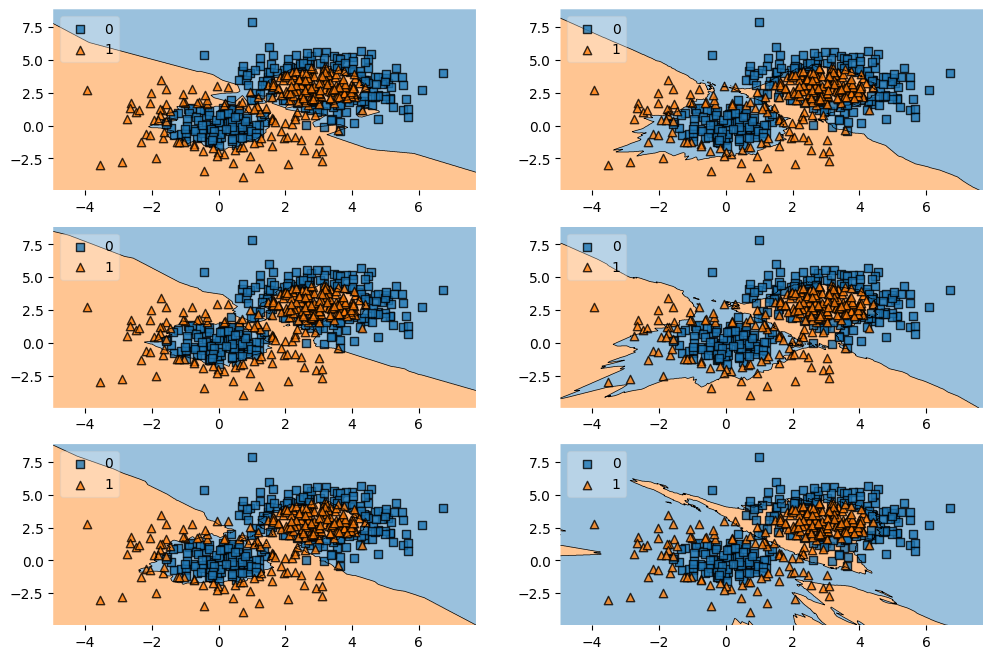

In [58]:
### Your code is here

#plot_decision_regions(X=np.array(X), y=np.array(y) ,clf=knn_list[0], legend=2)
fig = plt.figure()
gs0 = gridspec.GridSpec(1, 2, figure=fig)

gs1 = gridspec.GridSpecFromSubplotSpec(3, 1, subplot_spec=gs0[0])
for n in range(3):
    ax = fig.add_subplot(gs1[n])
    ax = plot_decision_regions(X=np.array(X), y=np.array(y) ,clf=knn_list[n], legend=2)


gs2 = gridspec.GridSpecFromSubplotSpec(3, 1, subplot_spec=gs0[1])
for n in range(3):
    ax = fig.add_subplot(gs2[n])
    ax = plot_decision_regions(X=np.array(X), y=np.array(y) ,clf=knn_list[n+3], legend=2)

plt.show()

1. Как меняется решающая поверхность с ростом числа соседей?
2. Какое оптимальное число соседей с точки зрения устройства данных и геометрии решающих поверхностей? Поясните свой ответ, опираясь на полученные графики.
3. Лучше ли справляется kNN по сравнению с логистической регрессией?

**Задание 4.** Скачайте уже известный вам датасет [SigmaCabs](https://www.kaggle.com/datasets/arashnic/taxi-pricing-with-mobility-analytics). Обучите классификатор kNN на отнормированных и не отнормированных данных, подобрав лучшие гиперпараметры среди $k \in [1, 5, 10]$. Замерьте качество на тестовой выборке. \
Почему нормирование данных помогает улучшить качество?

In [108]:
df = pd.read_csv('processed_sigma_cabs.csv')
df.head()

,Trip_Distance,Customer_Since_Months,Life_Style_Index,Customer_Rating,Cancellation_Last_1Month,Var1,Var2,Var3,Surge_Pricing_Type,Type_of_Cab_B,...,Destination_Type_F,Destination_Type_G,Destination_Type_H,Destination_Type_I,Destination_Type_J,Destination_Type_K,Destination_Type_L,Destination_Type_M,Destination_Type_N,Gender_Male
0,6.77,1.0,2.42769,3.90500,0,40.0,46,60,2,1,...,0,0,0,0,0,0,0,0,0,0
1,29.47,10.0,2.78245,3.45000,0,38.0,56,78,2,1,...,0,0,0,0,0,0,0,0,0,1
2,41.58,10.0,2.79805,3.50125,2,61.0,56,77,2,1,...,0,0,0,0,0,0,0,0,0,1
3,61.56,10.0,2.79805,3.45375,0,61.0,52,74,3,0,...,0,0,0,0,0,0,0,0,0,1
4,54.95,10.0,3.03453,3.40250,4,51.0,49,102,2,0,...,0,0,0,0,0,0,0,0,0,1


In [109]:
X = df.drop('Surge_Pricing_Type', axis=1)
y = df['Surge_Pricing_Type']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, 
                                                    shuffle=True, random_state=2022)

In [110]:
### Your code is here

param_grid = {
    'model__n_neighbors': [1, 5, 10]
}
pipe = Pipeline([('scaler', StandardScaler()),
               ('model', KNeighborsClassifier())])


search = GridSearchCV(pipe, param_grid)

search.fit(X_train, y_train)

print(f"Best parameter (CV score={search.best_score_:.5f}):")
print(search.best_params_)





Best parameter (CV score=0.65905):
{'model__n_neighbors': 10}


In [111]:
pipe = Pipeline([('scaler', StandardScaler()),
               ('model', KNeighborsClassifier(n_neighbors=10, p=2))])
pipe.fit(X_train, y_train)
print(classification_report(y_test, pipe.predict(X_test), digits=3))

              precision    recall  f1-score   support

           1      0.648     0.565     0.603      5372
           2      0.630     0.780     0.697     11349
           3      0.726     0.574     0.641      9612

    accuracy                          0.661     26333
   macro avg      0.668     0.639     0.647     26333
weighted avg      0.669     0.661     0.657     26333



**Задание 5.** Обучите классификатор kNN на отнормированных данных с помощью метрики Минковского. 
$$
\rho(x, z) = \bigg(\sum_i |x_i - z_i|^p\bigg) ^{1/p}
$$

Значение параметра `p` возьмите равным единице. Замерьте качество на тестовой выборке и сравните с предыдущим заданием, где `p = 2`.

In [112]:
### Your code is here

pipe = Pipeline([('scaler', StandardScaler()), 
                 ('KNN', KNeighborsClassifier(n_neighbors=10, p=1))])

pipe.fit(X_train, y_train)
print(classification_report(y_test, pipe.predict(X_test), digits=3))

              precision    recall  f1-score   support

           1      0.644     0.571     0.605      5372
           2      0.631     0.782     0.698     11349
           3      0.730     0.569     0.639      9612

    accuracy                          0.661     26333
   macro avg      0.668     0.641     0.648     26333
weighted avg      0.669     0.661     0.658     26333



**Задание 6.** Скачайте датасет [California Housing Prices](https://www.kaggle.com/datasets/camnugent/california-housing-prices), в котором мы будем предсказывать среднюю стоимость жилья. В качестве признаков будем использовать `['longitude', 'latitude']`, посмотрите на них с помощью scatterplot. \
По какой характеристике наш kNN регрессор в этом случае подбирает соседей?

1. Обучите обыкновенную линейную регрессию и замерьте RMSE на тренировочной и тестовой выборках.
2. Обучите kNN регрессор на отнормированных данных, подобрав лучшие гиперпараметры $k \in [1, 2, ..., 9]$. 
3. Обучите kNN регрессор с гауссовским ядром, взяв параметр k из предыдущего пункта и подобрав оптимальное значение ширины окна среди предложенных $h \in np.arange(0.02, 0.1, 0.01)$.

Как ширина окна влияет на веса при усреднении ответа по соседям? 

In [113]:
df = pd.read_csv('housing.csv')
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


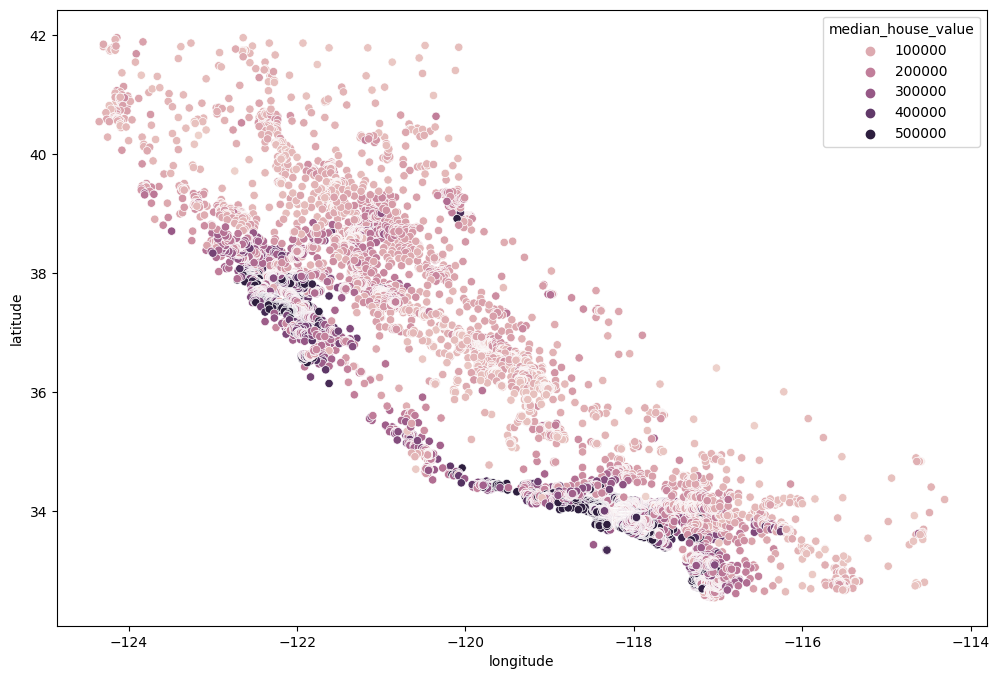

In [114]:
X = df[['longitude', 'latitude']]
y = df['median_house_value']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, 
                                                    shuffle=True, random_state=2022)
sns.scatterplot('longitude', 'latitude', data=X, hue=y);

In [82]:
### Your code is here
#LR RMSE
model_LR = LogisticRegression()
model_LR.fit(X_train, y_train)

LogisticRegression()

In [83]:
print(f"RMSE on train {(np.mean((model_LR.predict(X_train)-y_train)**2))**0.5}")
print(f"RMSE on test {(np.mean((model_LR.predict(X_test)-y_test)**2))**0.5}")

RMSE on train 271935.5726334163
RMSE on test 273706.1788702922


In [89]:
list(np.arange(1,10))

[1, 2, 3, 4, 5, 6, 7, 8, 9]

In [115]:
# kNN best nn
param_grid = {
    'model__n_neighbors': list(np.arange(1,10))
}
pipe = Pipeline([('scaler', StandardScaler()),
               ('model', KNeighborsClassifier())])


search = GridSearchCV(pipe, param_grid)

search.fit(X_train, y_train)

print(f"Best parameter (CV score={search.best_score_:.5f}):")
print(search.best_params_)




Best parameter (CV score=0.03834):
{'model__n_neighbors': 9}


In [145]:
def kernel(distances, h=h):
    
        const = 1 / (np.sqrt(2 * np.pi))
        power = (-1/2) * ((distances)**2) / h**2
    
        return const * np.exp(power)


In [156]:
# kNN best h
RMSE_train_dict = {}
RMSE_test_dict = {}
for h in np.arange(0.02, 0.1, 0.01):
    def kernel(distances, h=h):
    
        const = 1 / (np.sqrt(2 * np.pi))
        power = (-1/2) * ((distances)**2) / h**2
    
        return const * np.exp(power)
        
    pipe_2 = Pipeline([('scaler', StandardScaler()),
                       ('model', KNeighborsClassifier(n_neighbors=9, weights=kernel))])
    pipe_2.fit(X_train, y_train)
    RMSE_train_dict.update({h:(np.mean((pipe_2.predict(X_train)-y_train)**2))**0.5})
    RMSE_test_dict.update({h:(np.mean((pipe_2.predict(X_test)-y_test)**2))**0.5})
    print(f"RMSE on train {(np.mean((pipe_2.predict(X_train)-y_train)**2))**0.5}")
    print(f"RMSE on test {(np.mean((pipe_2.predict(X_test)-y_test)**2))**0.5}")

RMSE on train 43932.964087381464
RMSE on test 66980.89029334486
RMSE on train 44218.64933892315
RMSE on test 67432.20370932878
RMSE on train 44290.17915176959
RMSE on test 67437.31753790936
RMSE on train 44420.24084639506
RMSE on test 67440.54325276597
RMSE on train 44422.19881903231
RMSE on test 67450.7613205112
RMSE on train 44424.5683830289
RMSE on test 67463.58262050498
RMSE on train 44429.199671015645
RMSE on test 67459.80851390013
RMSE on train 44468.05496333794
RMSE on test 67484.46296460845


In [155]:
RMSE_train_dict

{0.02: 43932.964087381464,
 0.03: 44218.64933892315,
 0.039999999999999994: 44290.17915176959,
 0.049999999999999996: 44420.24084639506,
 0.06: 44422.19881903231,
 0.06999999999999999: 44424.5683830289,
 0.07999999999999999: 44429.199671015645,
 0.09: 44468.05496333794}

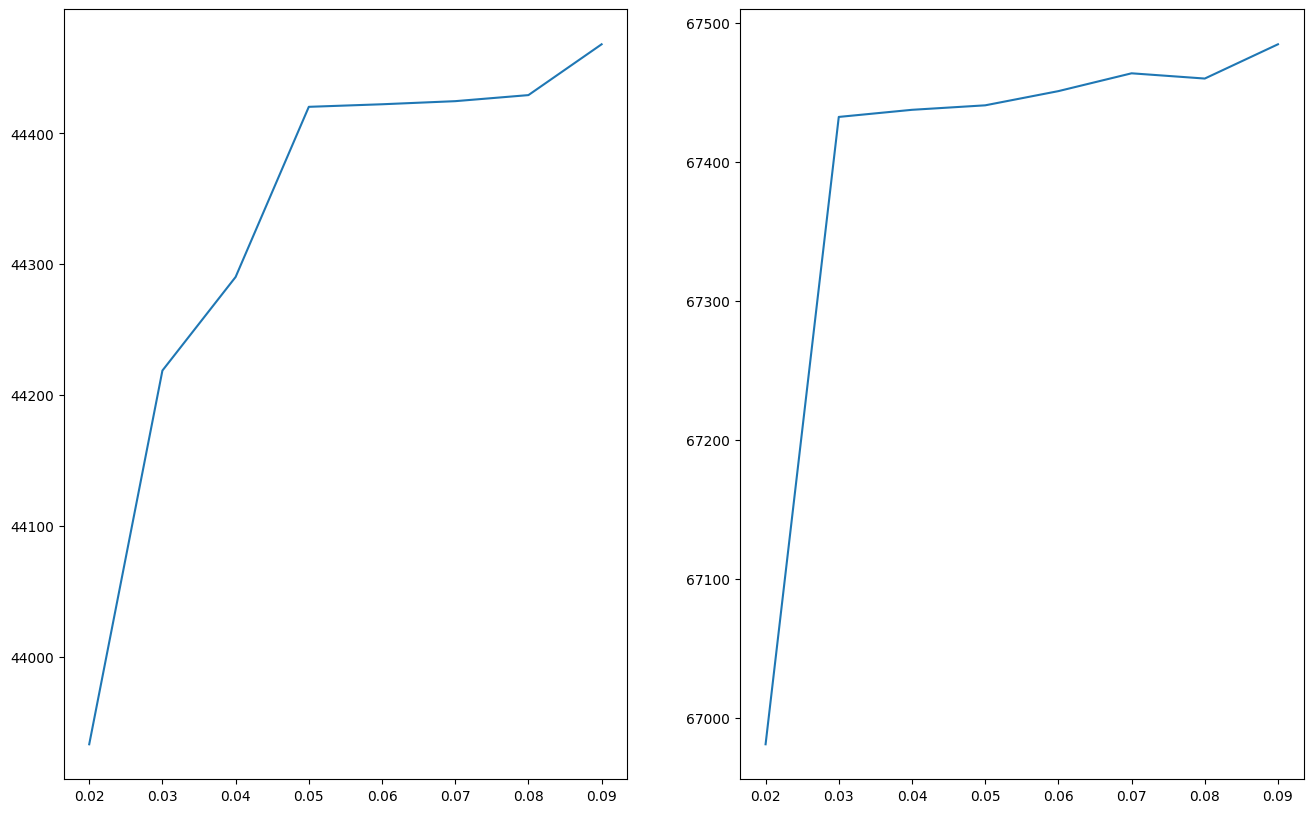

In [159]:
fig = plt.figure()
fig.set_size_inches(16, 10)




gs0 = gridspec.GridSpec(1, 2, figure=fig)

gs1 = gridspec.GridSpecFromSubplotSpec(1, 1, subplot_spec=gs0[0])
ax = fig.add_subplot(gs1[0])
ax = plt.plot(list(RMSE_train_dict.keys()), list(RMSE_train_dict.values()))


gs2 = gridspec.GridSpecFromSubplotSpec(1, 1, subplot_spec=gs0[1])
ax = fig.add_subplot(gs2[0])
ax = plt.plot(list(RMSE_test_dict.keys()), list(RMSE_test_dict.values()))